# Exploratory Analysis

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from scripts.helper_functions import *

The Artic Sea Ice Extent dataset tracks the total region with at least 15% sea ice cover from 1978 through 2018. This dataset was found on data.world, but its original source is the [National Snow & Ice Data Center](https://nsidc.org/data/explore-data). I chose this dataset because I wanted to look at the effects of climate change. <br><br>
The dataset contains two columns: Date and Extent (million sq km) and contains 12751 samples. The extent column, which is measured in million square kilometers, was record every 2 days between October 1978 and March 2018.

In [7]:
# Importing the data
sea_ice_df = pd.read_csv('./data/arctic_sea_ice_extent.csv')
sea_ice_df.head()

,Date,Extent (million sq km)
0,10/26/1978,10.231
1,10/28/1978,10.420
2,10/30/1978,10.557
3,11/1/1978,10.670
4,11/3/1978,10.777


In [8]:
sea_ice_df.shape

(12751, 2)

In [9]:
# Update column names
sea_ice_df = convert_column_names(sea_ice_df)

Reformatted column names: Index(['date', 'extent_million_sq_km'], dtype='object')


In [10]:
# Create year and month columns
sea_ice_df['year'] = pd.DatetimeIndex(sea_ice_df['date']).year
sea_ice_df['month'] = pd.DatetimeIndex(sea_ice_df['date']).month

In [11]:
# View the data
sea_ice_df.head(-10)

,date,extent_million_sq_km,year,month
0,10/26/1978,10.231,1978,10
1,10/28/1978,10.420,1978,10
2,10/30/1978,10.557,1978,10
3,11/1/1978,10.670,1978,11
4,11/3/1978,10.777,1978,11
...,...,...,...,...
12736,3/17/2018,14.466,2018,3
12737,3/18/2018,14.349,2018,3
12738,3/19/2018,14.309,2018,3
12739,3/20/2018,14.210,2018,3


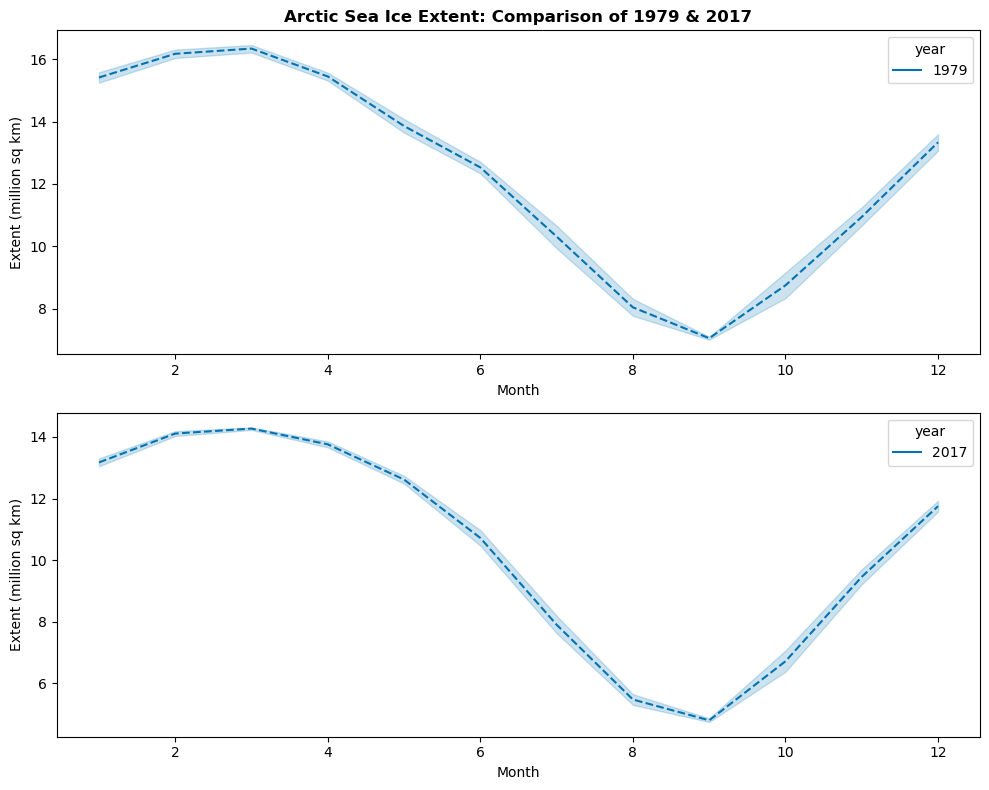

In [12]:
# Filtering data for specific years (assuming 'sea_ice_df' is your DataFrame)
sea_ice_1979 = sea_ice_df[sea_ice_df['year'] == 1979]
sea_ice_2017 = sea_ice_df[sea_ice_df['year'] == 2017]

# Create subplots with two rows and one column
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot for 1978 on the first subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_1979, hue='year', linestyle='dashed', palette='colorblind', ax=axes[0])
axes[0].set_title('Arctic Sea Ice Extent: Comparison of 1979 & 2017', fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Extent (million sq km)')

# Plot for 2018 on the second subplot
sns.lineplot(x='month', y='extent_million_sq_km', data=sea_ice_2017, hue='year', linestyle='dashed', palette='colorblind', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Extent (million sq km)')

plt.tight_layout()  # Adjust subplots to prevent overlap

# Show plot
plt.show()